# Prediction

## Load preprocessed dataframes

In [1]:
from utils import *

train_df = pd.read_pickle("../out/train.pkl")
test_df = pd.read_pickle("../out/test.pkl")

## Columns to drop and feature target

In [2]:
columns_to_drop = ["loan_id", "status"]
target_column = "status"

train_df.drop(columns_to_drop, axis=1).head()

,loan_amount,duration,payments,client_count,issuance_frequency_per_month,sex,age,code,no. of inhabitants,no. of municipalities with inhabitants < 499,...,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,account_age,days_since_last_transaction,reached_negative_balance,criminality
0,80952,24,3373,2,1.000000,1,53,1,1204953,0,...,1,100.0,12541,0.29,0.43,167,313,5,False,0.011146
1,30276,12,2523,1,1.000000,0,59,21,103347,87,...,7,67.0,9104,1.51,2.07,123,388,19,False,0.000532
2,165960,24,6915,1,1.000000,0,54,16,93931,74,...,8,56.9,8427,1.12,1.54,107,561,2,False,0.000415
3,88440,12,7370,2,13.044643,0,53,40,128118,9,...,8,85.3,9317,6.49,7.07,97,179,6,False,-0.000601
4,104808,12,8734,2,1.000000,1,59,66,125832,151,...,5,48.3,8512,3.51,4.12,102,186,6,False,-0.001144


## Tune Models

### Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 7)
}

dt, dt_fs, dt_os, dt_fs_os = (tune_model(
    train_df, 
    DecisionTreeClassifier(),
    parameter_grid, 
    columns_to_drop, 
    target_column,
    oversample=oversample,
    feature_selection=feature_selection
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

Best score: 0.8429525862068965
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__splitter': 'random'}
Best score: 0.8052124384236453
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__splitter': 'best'}
Best score: 0.7679156403940886
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__splitter': 'random'}
Best score: 0.7357974137931034
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 4, 'model__splitter': 'best'}


### SVM
Needs to be scaled (StandardScaler)

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

parameter_grid = {
    'C': [1, 10, 50],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svc, svc_fs, svc_os, svc_fs_os = (tune_model(
    train_df, 
    SVC(probability=True), 
    parameter_grid,
    columns_to_drop, 
    target_column, 
    scaler=StandardScaler()
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

Best score: 0.800942118226601
Best parameters: {'model__C': 1, 'model__gamma': 0.0001, 'model__kernel': 'rbf'}
Best score: 0.800942118226601
Best parameters: {'model__C': 1, 'model__gamma': 0.0001, 'model__kernel': 'rbf'}


###  K-nearest neighbours (KNN)
Just like the SVM model, the KNN model also requires the data to be scaled.

In [5]:
from sklearn import neighbors

parameter_grid = {
    'n_neighbors': [4, 5, 6, 7, 10, 15],
    'leaf_size': [5, 10, 15, 20, 50, 100],
    'n_jobs': [-1],
    'algorithm': ['auto']
}

knn, knn_fs, knn_os, knn_fs_os = (tune_model(
    train_df, 
    neighbors.KNeighborsClassifier(), 
    parameter_grid, 
    columns_to_drop, 
    target_column, 
    scaler=StandardScaler()
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

KeyboardInterrupt: 

### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

parameter_grid = {}

nb, nb_fs, nb_os, nb_fs_os = (tune_model(
    train_df, 
    GaussianNB(),
    parameter_grid, 
    columns_to_drop, 
    target_column, 
    scaler=StandardScaler()
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

Best score: 0.7414470443349754
Best parameters: {}
Best score: 0.7414470443349754
Best parameters: {}


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1],  # Use all cores
    'criterion': ['gini', 'entropy']
}

rfc, rfc_fs, rfc_os, rfc_fs_os = (tune_model(
    train_df, 
    RandomForestClassifier(), 
    parameter_grid, 
    columns_to_drop, 
    target_column
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

Best score: 0.8080080049261082
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50, 'n_jobs': -1}
Best score: 0.8045135467980297
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1}


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

parameter_grid = {
    "max_iter": [1000, 5000, 10000],
    "solver": ["lbfgs"]
}

lr, lr_fs, lr_os, lr_fs_os = (tune_model(
    train_df,
    LogisticRegression(),
    parameter_grid,
    columns_to_drop,
    target_column
) for oversample, feature_selection in ((False, False), (False, True), (True, False), (True,True)))

Best score: 0.5864839901477833
Best parameters: {'max_iter': 1000, 'solver': 'lbfgs'}
Best score: 0.5864839901477833
Best parameters: {'max_iter': 1000, 'solver': 'lbfgs'}


## Comparing Models

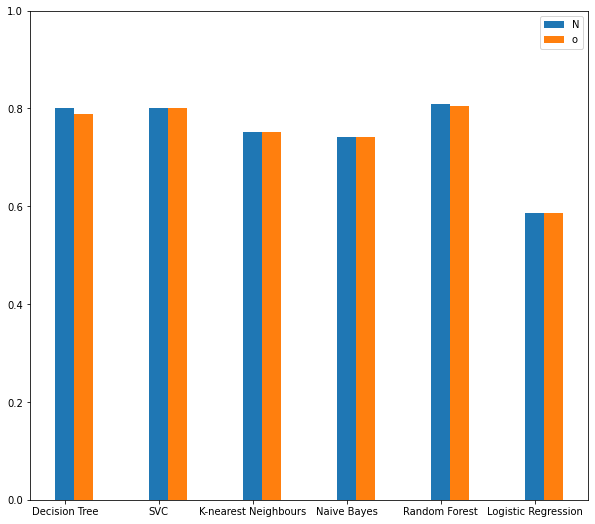

In [ ]:
scores = {
    "Decision Tree" : [dt, dt_fs, dt_os, dt_fs_os], 
    "SVC" : [svc, svc_fs, svc_os, svc_fs_os], 
    "K-nearest Neighbours" : [knn, knn_fs, knn_os, knn_fs_os], 
    "Naive Bayes" : [nb, nb_fs, nb_os, nb_fs_os], 
    "Random Forest" : [rfc, rfc_fs, rfc_os, rfc_fs_os], 
    "Logistic Regression": [lr, lr_fs, lr_os, lr_fs_os]
}

labels = ["No Feature selection", "Oversampling"]

ind = np.arange(6)

plt.figure(figsize=(10, 9))
plt.bar(ind, [i[0].best_score_ for i in scores.values()], 0.2)

ax = plt.bar(ind + 0.2, [i[1].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[2].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[3].best_score_ for i in scores.values()], 0.2)

plt.xticks(ind, scores.keys())
plt.legend(labels, loc=1)
plt.ylim(0, 1)
plt.show()

## Save results

In [ ]:
X_result = test_df.drop(columns_to_drop, axis=1)

y_result = rfc.predict_proba(X_result)[:, 1]

result = pd.DataFrame({"Id": test_df["loan_id"], "Predicted": y_result})
result.drop_duplicates(inplace=True)
result.to_csv("../out/result.csv", index=False)